# Generate and count data

In [ ]:
using Pkg
Pkg.add("IJulia")

using IJulia
notebook()



Use Nteract on the desktop to use Jupyter notebooks

In [4]:
N = 1000
data = rand(1:6, N)

1000-element Array{Int64,1}:
 3
 4
 1
 1
 2
 4
 4
 2
 5
 6
 1
 3
 5
 ⋮
 2
 2
 6
 1
 2
 6
 6
 6
 2
 5
 2
 6

In [6]:
function count_outcomes(data, num_sides)  # maximum number in the data
    counts = zeros(Int, num_sides)

    for result in data   # alternative:  for i in 1:length(data)
        counts[result] += 1
    end

    return counts 
end

count_outcomes (generic function with 1 method)

In [8]:
count_outcomes(data, 6)    

6-element Array{Int64,1}:
 156
 166
 160
 180
 160
 178

In [9]:
count_outcomes(data, 8)    

8-element Array{Int64,1}:
 156
 166
 160
 180
 160
 178
   0
   0

In [10]:
data = rand(1:6, N)
count_outcomes(data, 6)    

6-element Array{Int64,1}:
 165
 145
 165
 163
 203
 159

In [13]:
data = rand(1:6, N)
counts = count_outcomes(data, 6)  

6-element Array{Int64,1}:
 178
 162
 178
 159
 173
 150

In [12]:
using Plots

This is **some** text and equations:

$$y = x^2$$

[Google](www.google.com)

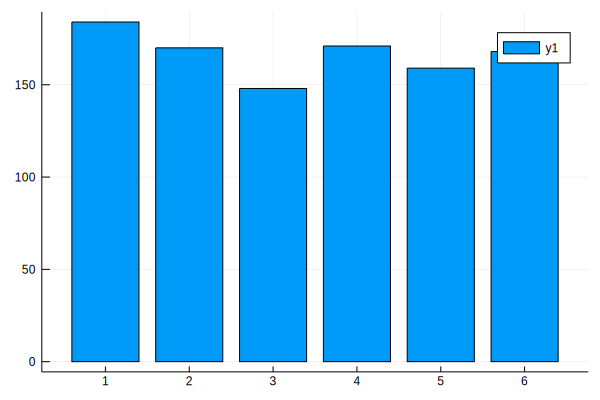

In [27]:
data = rand(1:6, N)
counts = count_outcomes(data, 6)  
bar(counts)

Interactive movie:

In [28]:
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-11647983241965965364\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-3434966674086953003\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-11647983241965965364\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

## Frequencies

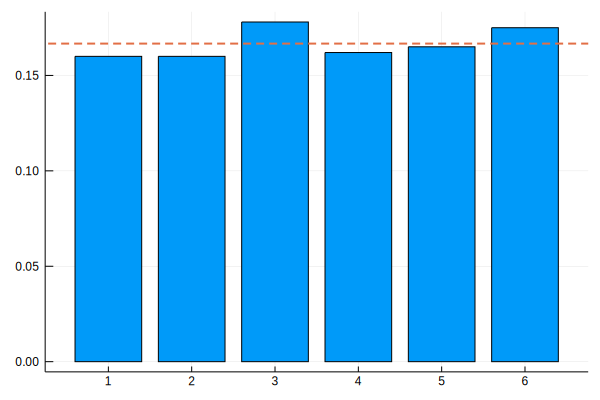

In [44]:
data = rand(1:6, N)
counts = count_outcomes(data, 6)  
bar(counts ./ N, leg=false)
hline!( [1/6], ls=:dash, lw=2)

## Variability

In [50]:
N = 10
data = rand(1:6, N)

10-element Array{Int64,1}:
 5
 1
 5
 2
 6
 2
 1
 2
 1
 4

In [51]:
[ data[i] == 1 for i in 1:N]

10-element Array{Bool,1}:
 0
 1
 0
 0
 0
 0
 1
 0
 1
 0

In [52]:
[value == 1 for value in data]

10-element Array{Bool,1}:
 0
 1
 0
 0
 0
 0
 1
 0
 1
 0

In [53]:
[value for value in data if value == 1]

3-element Array{Int64,1}:
 1
 1
 1

In [54]:
value = 2

2

In [55]:
value == 1

false

In [56]:
length([value for value in data if value == 1])

3

In [57]:
sum([value == 1 for value in data])

3

In [58]:
count([value == 1 for value in data])

3

In [59]:
count(value == 1 for value in data)

3

In [60]:
(value == 1 for value in data)

Base.Generator{Array{Int64,1},getfield(Main, Symbol("##25#26"))}(getfield(Main, Symbol("##25#26"))(), [5, 1, 5, 2, 6, 2, 1, 2, 1, 4])

In [61]:
count(value == 1 for value in data)

3

In [63]:
data .== 1

10-element BitArray{1}:
 0
 1
 0
 0
 0
 0
 1
 0
 1
 0

In [65]:
sum(data .== 1)

3

In [66]:
v = [3, 4, 5]

3-element Array{Int64,1}:
 3
 4
 5

In [67]:
count(v)

TypeError: TypeError: non-boolean (Int64) used in boolean context

In [68]:
true == 1

true

In [69]:
false == 0   # mathematical concept "equality"

true

In [71]:
true === 1   # computer science concept "egal" -- identical Julia objects

false

In [72]:
1 === 1

true

In [73]:
3 ⨥ 4

UndefVarError: UndefVarError: ⨥ not defined

In [74]:
⨥(a, b) = a + 2b

⨥ (generic function with 1 method)

In [75]:
3 ⨥ 4

11

In [76]:
⛄(a, b) = a + 2b

⛄ (generic function with 1 method)

In [77]:
⛄(3, 4)

11

In [78]:
n1(N) = count(rand(1:6, N) .== 1)

n1 (generic function with 1 method)

In [85]:
N = 100 # number of die rolls
num_experiments = 100 # repeat experiment:
n1_data = [n1(N) for i in 1:num_experiments] 
counts = count_outcomes(n1_data, N)
# better to use a Dict?


100-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 3
 5
 7
 5
 6
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [87]:
@manipulate for N in 1:100, num_experiments in 1:100 # repeat experiment:
    n1_data = [n1(N) for i in 1:num_experiments] 
    counts = count_outcomes(n1_data, N)
# better to use a Dict?
    bar(counts)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["N"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 100,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
50, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/dpsanders/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/dpsanders/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/dpsanders/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/dpsanders/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/dpsanders/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000011c599d50, Task (runnable) @0x000000011c599d50), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\

In [88]:
data

10-element Array{Int64,1}:
 5
 1
 5
 2
 6
 2
 1
 2
 1
 4

In [91]:
@which sum(data, 1)

sum(f, a) in Base at reduce.jl:403